In [25]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
from langchain_groq import ChatGroq

In [26]:
load_dotenv()

llm = ChatGroq(model='llama-3.1-8b-instant')

In [27]:
class JokeState(TypedDict):

    joke : str
    topic : str
    explaination:str 

In [28]:
def joke(state: JokeState):
    prompt = f'generate a joke on {state["topic"]}'
    response = llm.invoke(prompt)

    return{"joke":response}

In [29]:
def JokeExplaination(state: JokeState):
    prompt = f'generate an explaination on {state["joke"]}'
    response = llm.invoke(prompt)

    return{"explaination":response}

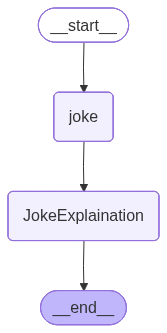

In [30]:
graph = StateGraph(JokeState)

graph.add_node('joke', joke)
graph.add_node('JokeExplaination', JokeExplaination)

graph.add_edge(START,'joke')
graph.add_edge('joke','JokeExplaination')
graph.add_edge('JokeExplaination', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

workflow



In [31]:
config1= {"configurable":{'thread_id':'1'}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 40, 'total_tokens': 60, 'completion_time': 0.026720254, 'prompt_time': 0.001763828, 'queue_time': 0.048630892, 'total_time': 0.028484082}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--7f16268f-97c4-4060-9097-b29612c50717-0', usage_metadata={'input_tokens': 40, 'output_tokens': 20, 'total_tokens': 60}),
 'topic': 'pizza',
 'explaination': AIMessage(content='**Explanation of Content: A Pizza-Related Pun**\n\nThe provided content is a simple joke in the format of a question and answer. Here\'s a breakdown of the content:\n\n* `Why did the pizza go to the doctor?`: This is the question part of the joke, setting up the unexpected punchline.\n* `

In [32]:
workflow.get_state(config=config1)

StateSnapshot(values={'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 40, 'total_tokens': 60, 'completion_time': 0.026720254, 'prompt_time': 0.001763828, 'queue_time': 0.048630892, 'total_time': 0.028484082}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--7f16268f-97c4-4060-9097-b29612c50717-0', usage_metadata={'input_tokens': 40, 'output_tokens': 20, 'total_tokens': 60}), 'topic': 'pizza', 'explaination': AIMessage(content='**Explanation of Content: A Pizza-Related Pun**\n\nThe provided content is a simple joke in the format of a question and answer. Here\'s a breakdown of the content:\n\n* `Why did the pizza go to the doctor?`: This is the question part of the joke, setting up the unexpec

In [34]:
config2={'configurable':{'thread_id':'2'}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'joke': AIMessage(content='Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted" and had a lot of "noodle" issues.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 40, 'total_tokens': 71, 'completion_time': 0.031463177, 'prompt_time': 0.001771714, 'queue_time': 0.053036772, 'total_time': 0.033234891}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--45e4d1c0-dc60-45b8-8ece-e8ddc61d6e5c-0', usage_metadata={'input_tokens': 40, 'output_tokens': 31, 'total_tokens': 71}),
 'topic': 'pasta',
 'explaination': AIMessage(content='**Explanation of Content: A Play on Words**\n\nThe content provided is a play on words that uses a common phrase "feeling a little twisted" and gives it a literal and humorous spin by applying it to a piece of spaghetti, which is a type of twisted past

In [35]:
workflow.get_state(config=config2)

StateSnapshot(values={'joke': AIMessage(content='Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted" and had a lot of "noodle" issues.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 40, 'total_tokens': 71, 'completion_time': 0.031463177, 'prompt_time': 0.001771714, 'queue_time': 0.053036772, 'total_time': 0.033234891}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--45e4d1c0-dc60-45b8-8ece-e8ddc61d6e5c-0', usage_metadata={'input_tokens': 40, 'output_tokens': 31, 'total_tokens': 71}), 'topic': 'pasta', 'explaination': AIMessage(content='**Explanation of Content: A Play on Words**\n\nThe content provided is a play on words that uses a common phrase "feeling a little twisted" and gives it a literal and humorous spin by applying it to a piece of spaghetti, which is a t

## Time Travel

In [49]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 40, 'total_tokens': 60, 'completion_time': 0.026720254, 'prompt_time': 0.001763828, 'queue_time': 0.048630892, 'total_time': 0.028484082}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--7f16268f-97c4-4060-9097-b29612c50717-0', usage_metadata={'input_tokens': 40, 'output_tokens': 20, 'total_tokens': 60}), 'topic': 'samosa'}, next=('JokeExplaination',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ba359-2d88-67a0-8001-adf795b5c575'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-11-05T10:52:50.818243+00:00', parent_config={'configurable': {'thread_id': '1

In [47]:
workflow.get_state({'configurable':{'thread_id':'1','checkpoint_id': '1f0ba318-7e94-637b-8000-14deb1b221e8'}})

StateSnapshot(values={'topic': 'pizza'}, next=('joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0ba318-7e94-637b-8000-14deb1b221e8'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-11-05T10:23:54.486053+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ba318-7e8e-6f3f-bfff-ee51da96ffe7'}}, tasks=(PregelTask(id='fe3c3f28-2d6e-0f29-bf44-f96ab066cc17', name='joke', path=('__pregel_pull', 'joke'), error=None, interrupts=(), state=None, result={'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 40, 'total_tokens': 60, 'completion_time': 0.026720254, 'prompt_time': 0.001763828, 'queue_time': 0.048630892, 'total_time': 0.028484082}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'fi

In [42]:
workflow.invoke(None, {'configurable':{'thread_id':'1','checkpoint_id': '1f0ba318-82ee-68cb-8001-a8b46d9bfe7b' }})

{'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 40, 'total_tokens': 60, 'completion_time': 0.026720254, 'prompt_time': 0.001763828, 'queue_time': 0.048630892, 'total_time': 0.028484082}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--7f16268f-97c4-4060-9097-b29612c50717-0', usage_metadata={'input_tokens': 40, 'output_tokens': 20, 'total_tokens': 60}),
 'topic': 'pizza',
 'explaination': AIMessage(content='**Content Analysis: A Playful Pizza Joke**\n\nThe provided content is a play on words, presenting a pizza-themed joke. The joke is structured as a question and answer, where the question "Why did the pizza go to the doctor?" is followed by the punchline "Because it was feeling a little cr

## Updating the state

In [48]:
workflow.update_state({'configurable':{'thread_id':'1','checkpoint_id': '1f0ba318-7e94-637b-8000-14deb1b221e8',"checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ba359-2d88-67a0-8001-adf795b5c575'}}

In [51]:
workflow.invoke(None, {'configurable':{'thread_id':'1','checkpoint_id': '1f0ba359-2d88-67a0-8001-adf795b5c575' }})

{'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 40, 'total_tokens': 60, 'completion_time': 0.026720254, 'prompt_time': 0.001763828, 'queue_time': 0.048630892, 'total_time': 0.028484082}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--7f16268f-97c4-4060-9097-b29612c50717-0', usage_metadata={'input_tokens': 40, 'output_tokens': 20, 'total_tokens': 60}),
 'topic': 'samosa',
 'explaination': AIMessage(content='**Content Analysis: "Why did the pizza go to the doctor?"**\n\nThe given content is a joke with a punchline. The question "Why did the pizza go to the doctor?" is a classic setup for a joke, and the response "Because it was feeling a little crusty" is a play on words.\n\nHere\'s a breakd